In [26]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import geopandas as gpd
import descartes
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from sklearn.cluster import KMeans
from myfunctions import *
sns.set()

In [2]:

datadf = pd.read_csv(r'All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')

In [3]:
datadf = datadf.set_index('id')

In [4]:
datadf.head(4)

,no_stop,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,first thing saw entered room dark curtains dra...,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy surprises hw u effortlessly make to...,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...
1439198461993-3fefd6db711e0342,Write fantasies inaginary dream world stories ...,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasies inaginary dream world stori...,0,Me Write fantasies / inaginary dream world sto...
1439575035515-3feb330512548cbd,dwarfs garden garden little boy Guarded roses ...,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0,"The dwarfs garden He had a garden , that littl..."


In [5]:
loc = datadf[['lat','lon']]
loc.lat = loc.lat.str[:10].astype(float)
loc.lon = loc.lon.str[:10].astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
temp = loc.sample(2000)
temp

,lat,lon
id,,
1550027414413-3f93e023e9765760,40.730479,-73.990758
1541027536471-3fe6ded48284853f,40.731435,-73.994182
1550530816969-3fec512d4b8c9568,1.797693,1.797693
1536543472656-3fd5005fd05db8b0,40.731446,-73.987997
1500295990005-3fd56ca78571a5aa,18.574954,73.893474
...,...,...
1482859698553-3fd13397ed3cb4fe,19.187236,72.834331
1572567831107-3feb3963dd5d7567,40.721964,-73.997304
1551886156643-3fddcdb6ae1bc456,40.731457,-73.988186


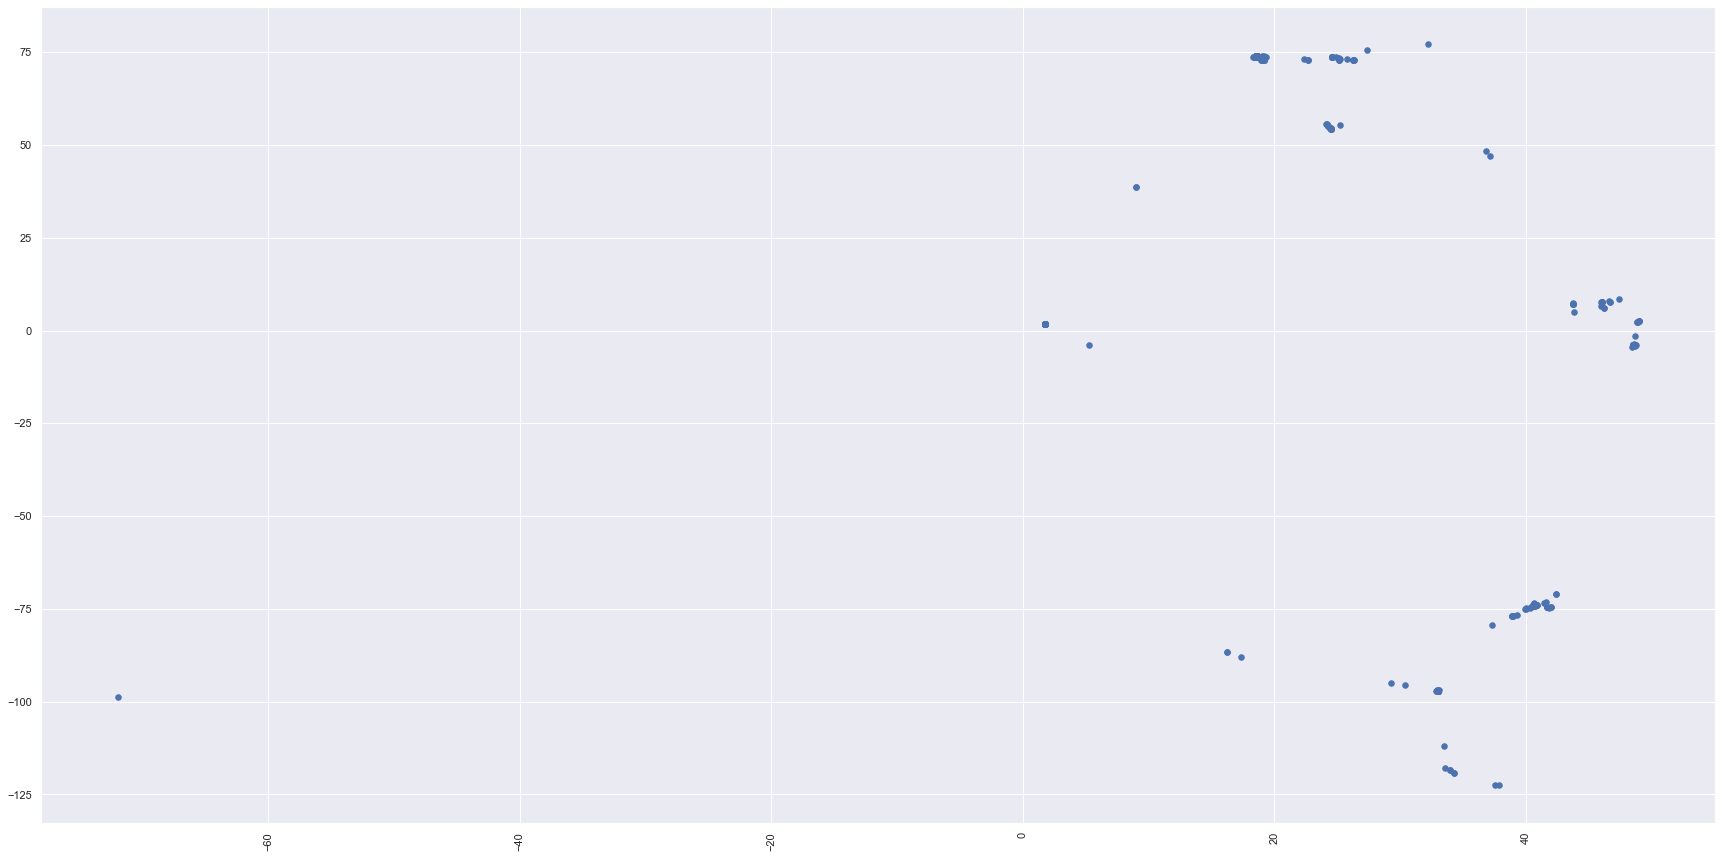

In [19]:
# loc.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.figure(figsize=(30,15))
plt.scatter(x = 'lat', y = 'lon', s=30, data=loc)
plt.xticks(rotation=90)
plt.show()

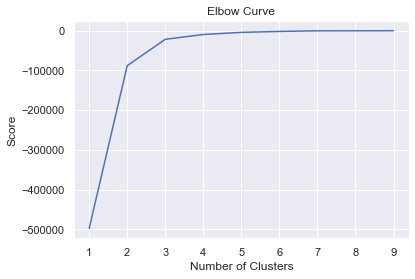

In [18]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = loc[['lat']]
X_axis = loc[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(loc[loc.columns[0:1]]) # Compute k-means clustering.
loc['cluster_label'] = kmeans.fit_predict(loc[loc.columns[0:1]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(loc[loc.columns[0:1]]) # Labels of each point

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
loc

,lat,lon,cluster_label
id,,,
1439137473084-3fc756cc3f8d6404,1.797693,1.797693,2
1439198245820-3fda14add91e3f20,1.797693,1.797693,2
1439198461993-3fefd6db711e0342,1.797693,1.797693,2
1439575035515-3feb330512548cbd,1.797693,1.797693,2
1440393646546-3fdb2bc02b9f8020,1.797693,1.797693,2
...,...,...,...
1572234096800-3fe09f3bcb856ceb,40.720720,-73.997461,1
1572394588516-3fe449570c8486e7,40.729790,-73.991662,1
1573136070396-3feded4b7c9ee046,40.728132,-74.000816,1


In [23]:
centers

array([[18.90745455],
       [39.76562681],
       [ 1.60998753]])

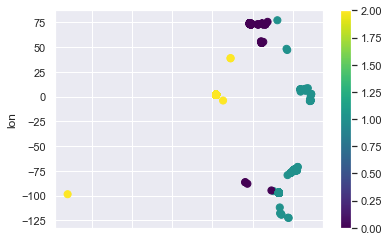

In [24]:
loc.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [36]:
world = gpd.read_file('All Data/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
maha = gpd.read_file('All Data/maharashtra/maharashtra_administrative/maharashtra_administrative.shp')
pune = gpd.read_file('All Data/maharashtra/pune/pune.shp')

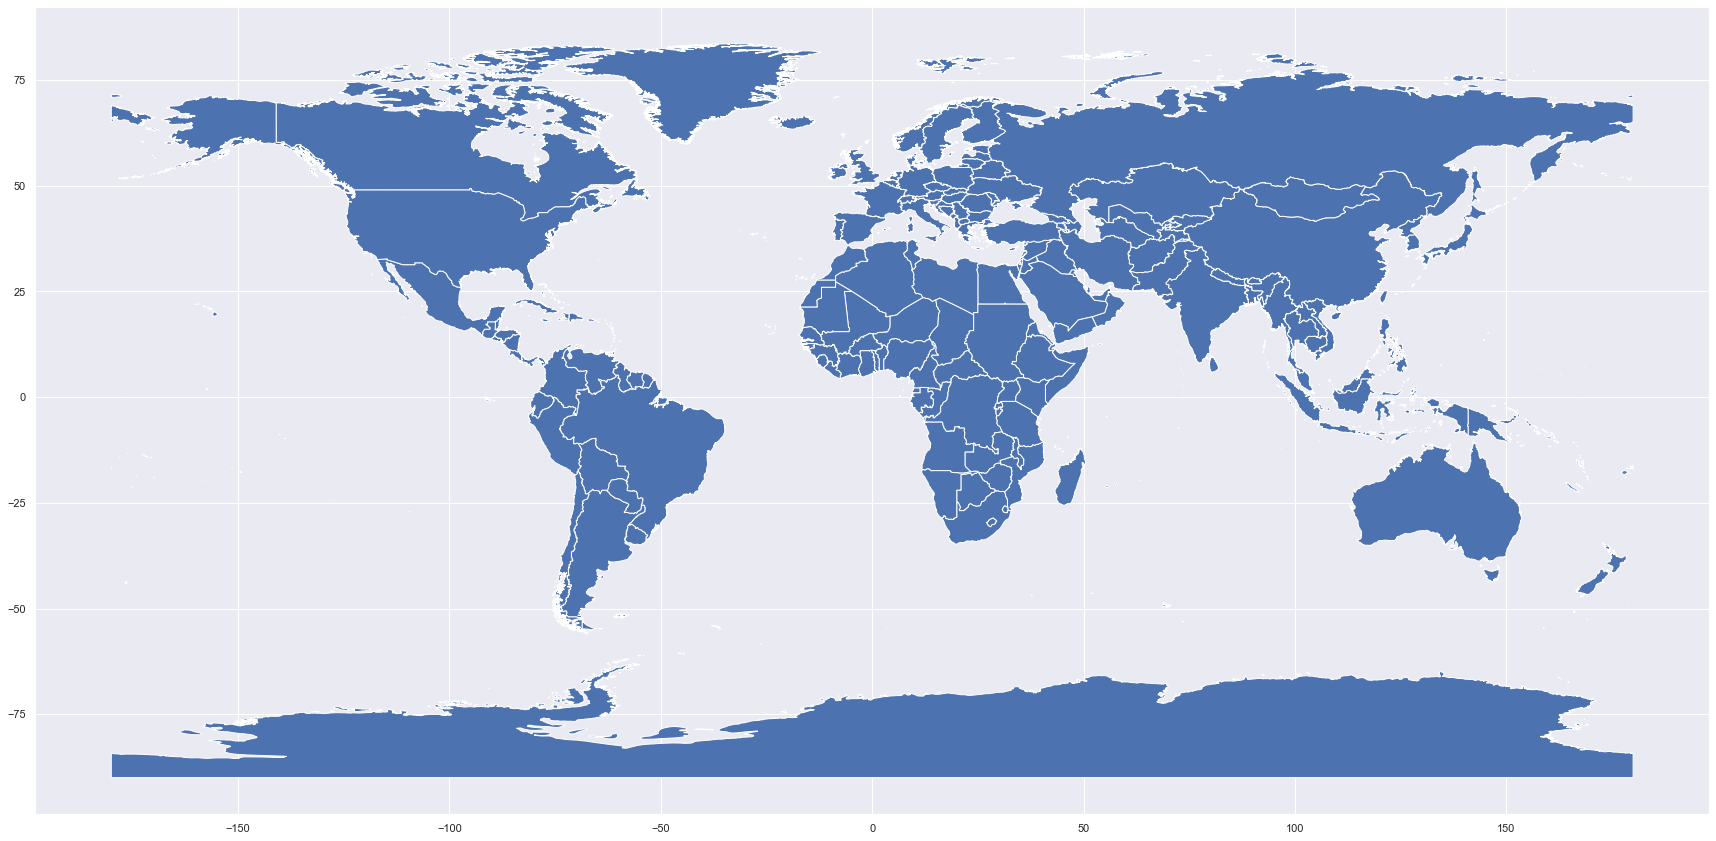

In [30]:
fig, ax = plt.subplots(figsize=(30,25))
world.plot(ax=ax)

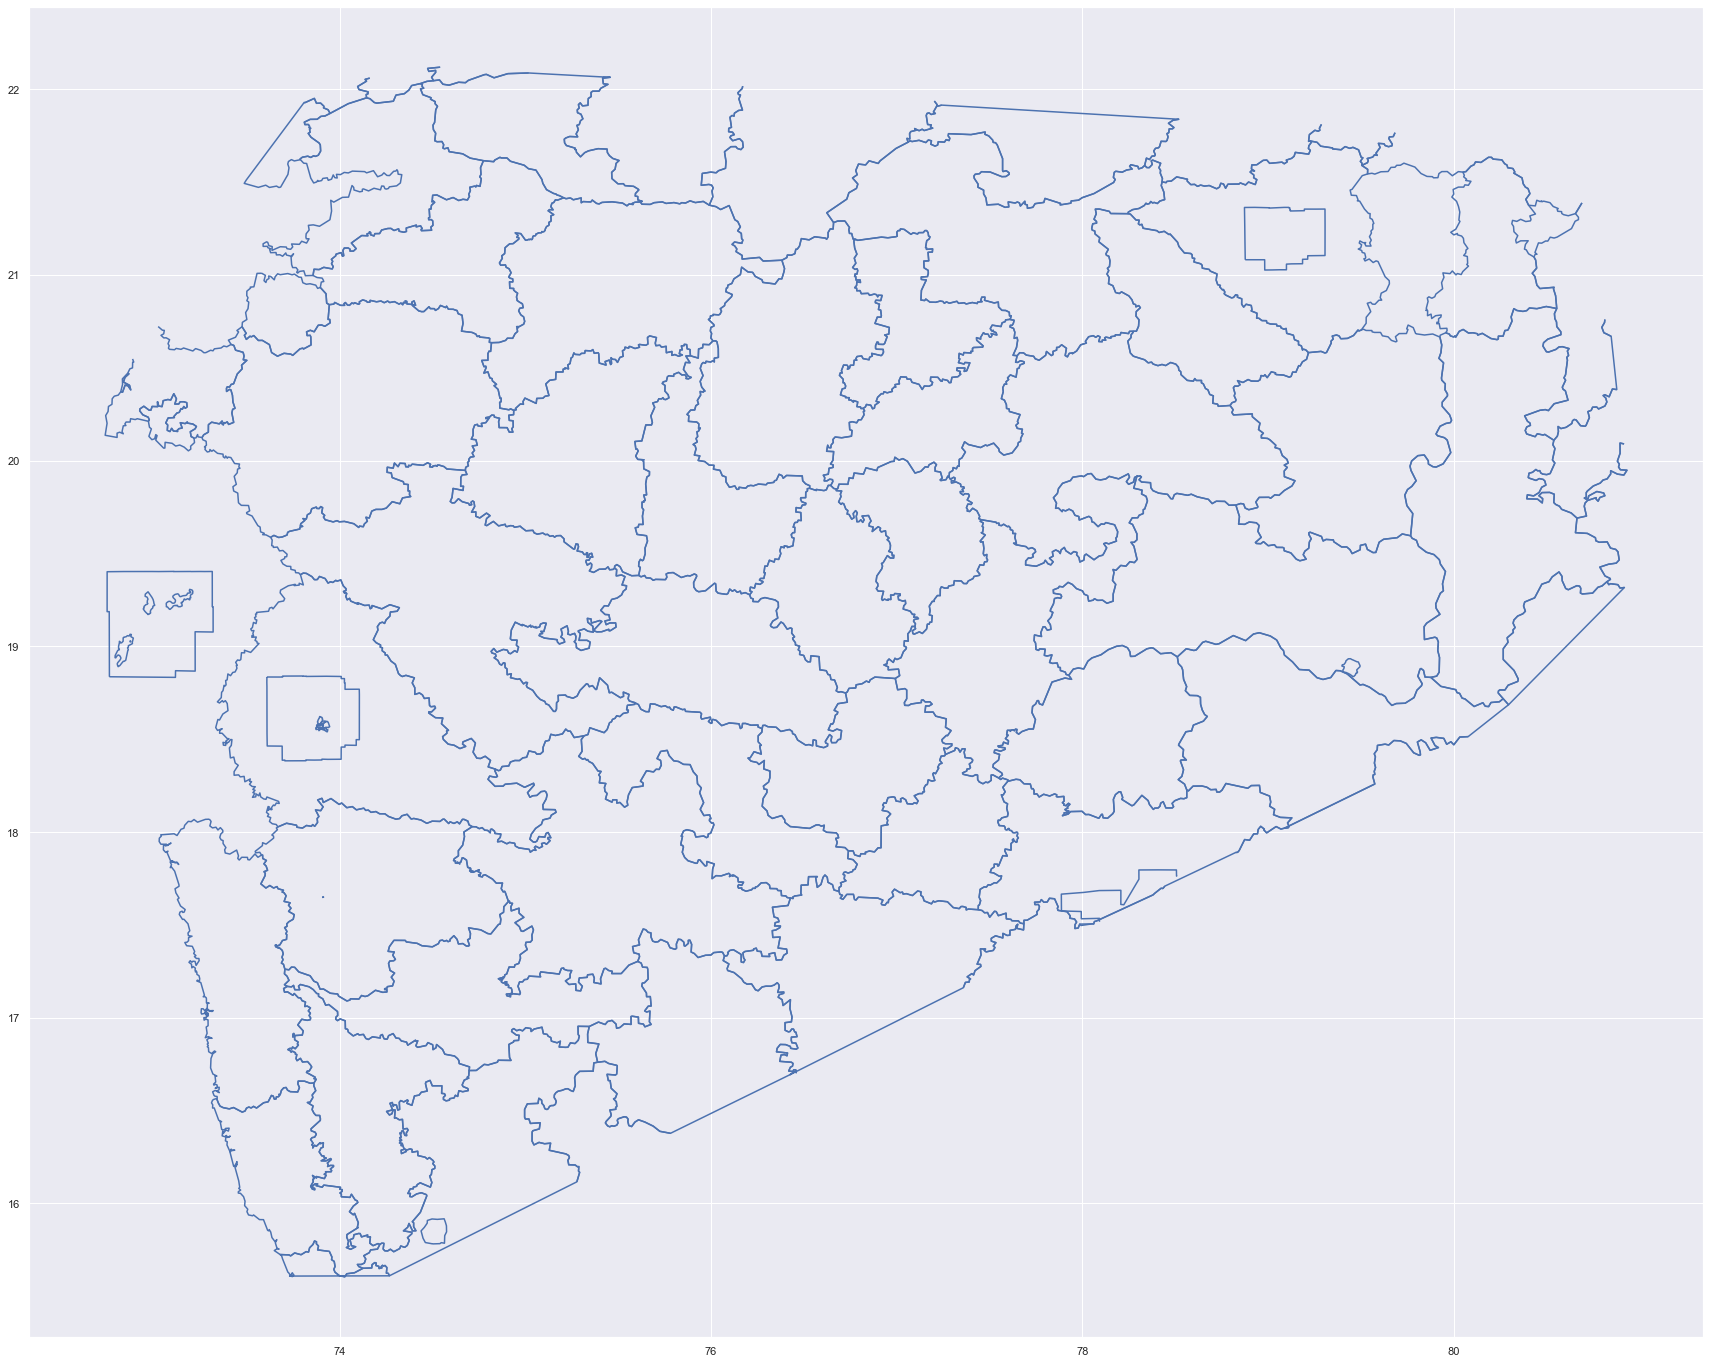

In [35]:
fig, ax = plt.subplots(figsize=(30,25))
maha.plot(ax=ax)

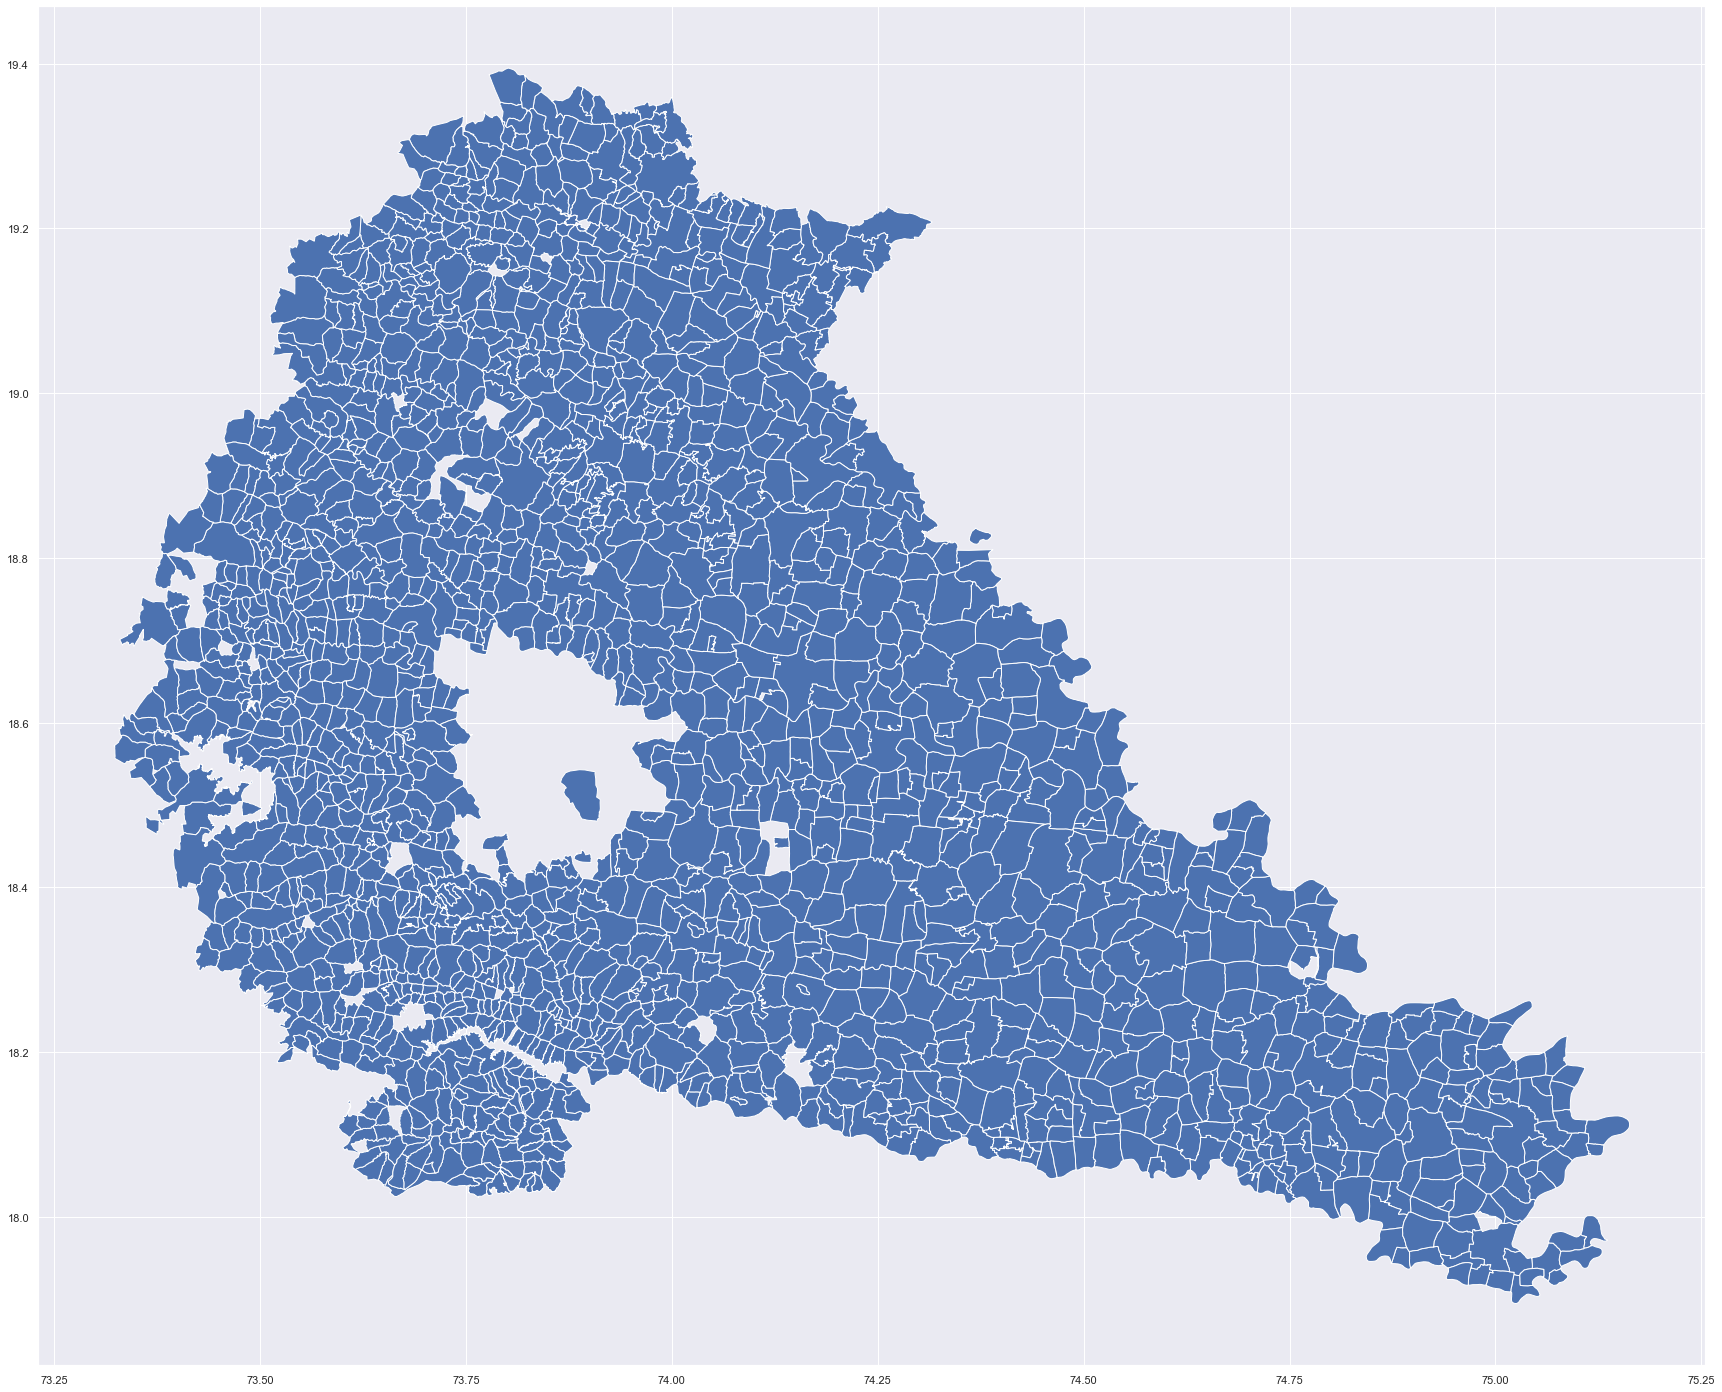

In [37]:
fig, ax = plt.subplots(figsize=(30,25))
pune.plot(ax=ax)